## HWRS 519 HW7

1. [Problem One](#Problem-one)
2. [Problem Two](#Problem-two)
3. [Problem Three](#Problem-three)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Problem one

![b-c_model.png](b-c_model.png)

| Soil texture | Porosity | Ks [cm.s-1] | hb [cm] |	b | hm,f [cm] |
|--------------|----------|-------------|---------|---|-----------|
|Sand|	0.395|	1.76x10-2|	-12.1|	4.05|	4.95|
|Loamy sand|	0.410|	1.56x10-2|	-9.0|	4.38|	6.13|
|Sandy loam|	0.435|	3.47x10-3|	-21.8|	4.90|	11.01|
|Silt loam|	0.485|	7.20x10-4|	-78.6|	5.30|	16.68|
|Loam|	0.451|	6.95x10-4|	-47.8|	5.39|	8.89|
|Clay loam|	0.476|	2.45x10-4|	-63.0|	8.52|	20.88|
|Sandy clay|	0.426|	2.17x10-4|	-15.3|	10.4|	23.90|
|Silty clay	|0.492|	1.03x10-4|	-49.0|	10.4|	29.22|
|Clay	|0.482|	1.28x10-4|	-40.5|	11.4|	31.63|


In [100]:
# set up dictionary of soil characteristics
d = {'texture': ['sand','loamy sand','sandy loam','silt loam','loam','clay loam','sandy clay','silty clay','clay'],
         'porosity' : [.395,.41,.435,.485,.451,.476,.426,.492,.482],
         'Ks' : [1.76e-2,1.56e-2,3.47e-3,7.2e-4,6.95e-4,2.45e-4,2.17e-4,1.03e-4,1.28e-4],
         'hb' : [-12.1,-9,-21.8,-78.6,-47.8,-63,-15.3,-49,-40.5],
         'b'  : [4.05,4.38,4.9,5.3,5.39,8.52,10.4,10.4,11.4],
         'hm' : [4.95,6.13,11.01,16.68,8.89,20.88,23.9,29.22,31.63]
        }

# create dataframe of soil characteristics
soils = pd.DataFrame(d)
# create a list of soil names
soilList = soils.texture.to_list()
# set soil names as index
soils.set_index('texture', inplace=True)

# create an initial df with matric potentials
soilTable = pd.DataFrame(np.arange(-1000, 0.0, .01), columns=['hm'])
# create dictionary with soil name keys and matric potentials
soilDict = {soilList[key]: soilTable for key in range(len(soilList))}

# brooks-corey model function
def bcModel(Ks,hb,b,hm):
    theta = (hm/hb)**(-1/b)
    K_unsat = Ks*theta**(2*b+3)

    return theta, K_unsat

In [123]:
for key in soilList:
    df = soils.loc[key]
    print(bcModel(df.Ks,df.hb,df.b,soilDict[key].hm)[0])

0    0.336212
Name: hm, dtype: float64
0    0.34114
Name: hm, dtype: float64
0    0.458046
Name: hm, dtype: float64
0    0.618855
Name: hm, dtype: float64
0    0.568848
Name: hm, dtype: float64
0    0.722899
Name: hm, dtype: float64
0    0.669038
Name: hm, dtype: float64
0    0.748268
Name: hm, dtype: float64
0    0.754826
Name: hm, dtype: float64


In [126]:
soilList = ['sand']
for key in soilList:
    df = soils.loc[key]
    soilDict[key]['theta'] = bcModel(df.Ks,df.hb,df.b,soilDict[key].hm)[0]
    soilDict[key]['K_unsat'] = bcModel(df.Ks,df.hb,df.b,soilDict[key].hm)[1]

In [128]:
soilDict['sand']

,hm,theta,K_unsat
0,-1000.00,0.336212,9.793195e-08
1,-999.99,0.336213,9.793464e-08
2,-999.98,0.336214,9.793732e-08
3,-999.97,0.336215,9.794001e-08
4,-999.96,0.336216,9.794269e-08
...,...,...,...
99995,-0.05,3.877898,6.010804e+04
99996,-0.04,4.097555,1.107995e+05
99997,-0.03,4.399201,2.437600e+05
99998,-0.02,4.862428,7.405986e+05


In [117]:
soilDict['silty clay']

,hm,theta,K_unsat
0,-1000.00,0.754826,9.029440e-08
1,-999.99,0.754827,9.029644e-08
2,-999.98,0.754827,9.029849e-08
3,-999.97,0.754828,9.030053e-08
4,-999.96,0.754829,9.030257e-08
...,...,...,...
99995,-0.05,1.799411,4.892950e+02
99996,-0.04,1.834979,8.107621e+02
99997,-0.03,1.881875,1.554710e+03
99998,-0.02,1.950012,3.891991e+03


In [115]:
soilList

['sand',
 'loamy sand',
 'sandy loam',
 'silt loam',
 'loam',
 'clay loam',
 'sandy clay',
 'silty clay',
 'clay']

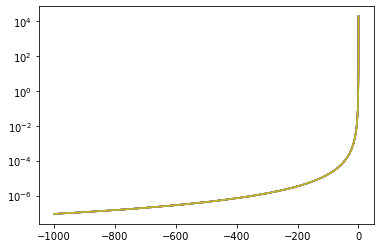

In [114]:
fig, ax = plt.subplots()

for key in soilList:
    df = soilDict[key]
    ax.plot(df.hm,df.K_unsat)
    plt.yscale('log')
plt.show()


In [113]:
for key in soilList:
    df = soilDict[key]
    ax = df.plot(df.hm,df.K_unsat)
    

KeyError: "None of [Float64Index([              -1000.0,               -999.99,\n                            -999.98,               -999.97,\n                            -999.96,               -999.95,\n                            -999.94,    -999.9300000000001,\n                 -999.9200000000001,    -999.9100000000001,\n              ...\n               -0.10000000090940375,  -0.09000000090941285,\n               -0.08000000090942194,  -0.07000000090943104,\n               -0.06000000090944013,  -0.05000000090944923,\n               -0.04000000090945832, -0.030000000909467417,\n              -0.020000000909476512, -0.010000000909485607],\n             dtype='float64', length=100000)] are in the [columns]"

#### Problem two

#### Problem three

sdf